# Tutorial 1 - Introduction to Constraint Programming
## In other words, get ready to have your mind blown.. 


## Introduction & Context


Constraint Programming is a rich declarative approach to solve combinatorial problems. This approach has been used to solve diverse real word applications such as scheduling, timetabling, planning, routing, supply chain, clustreing, data mining, classification, etc. See for instance https://www.a4cp.org/node/1281.

    
Constraint programming can be used to solve decision or optimisation problems. In both families, a problem must be stated as : 
- A set of variables (the unkown of the problem). Each variable $x$ is associated to a set of values $D(x)$ that is called to domain of $x$. The latter represents the possible values that $x$ can take. We will be using mostly integer finite variables. That is, a type of variables whose domain is a finite subset of  $\mathbb{Z}$
- A set of constraints. Each constraint restrics the possible combinantion of values allowed by the different varialbes in the scope of the constraint. For instance, the constraint $x<y$ restrics the value assigned to x to be less than the value assigned to y

A constraint can be seen as a (sub-)problem itself. In that sence, a problem can be defined as a conjunction of smaller problems. 


In a decision problem, for each variable $x$, the task is to assign a value from $\cal D(x)$ to $x$ such that every constraint is satisfied. In an opptimisation problem, the purpose is exactly the same, however, among all the possible solutions, we look for one that minimises or maximizes an objective function. 

We will be working on both decision and optimition problems. Throughout these tutorials, we focus on the modelling aspect of constraint programming along with a solid understanding of what is happening within a solver. 


We find many constraint solvers in the literature that are developped by both acamemics (for instance http://www.choco-solver.org/, miniCP http://www.minicp.org/, and GeCode https://www.gecode.org/) and industrials (for instance Google OR Tools https://developers.google.com/optimization and IBM ILOG CPLEX CP Optimizer https://www.ibm.com/products/ilog-cplex-optimization-studio). 

For an up-to-date list of solvers, you can have a look at the following two annual solver competitions: 
- Minizinc Challenge https://www.minizinc.org/challenge.html : the list of solvers can be found here https://www.minizinc.org/challenge2019/results2019.html
- http://xcsp.org/competition some  solvers can be found here http://www.cril.univ-artois.fr/XCSP19/results/results.php?idev=99 



## CpOptimizer


In these tutorials, we will be using [IBM ILOG CPLEX CP Optimizer](https://www.ibm.com/analytics/cplex-cp-optimizer). This tool is an industrial constraint programming solver developped by IBM (previously [ILOG](https://en.wikipedia.org/wiki/ILOG)). The solver supports many programming languages and plateforms. We will be using a python interface called docplex. 


### `docplex` - A python interface to CpOptimizer

`docplex` is a python package that can be used to solve constraint programming problems in python using either:

- a local installation of CpOptimizer;
- a cloud version of CpOptimizer (requires an account and credentials from IBM).

While being less versatile than the C++ interface of CpOptimizer, it is much easier and much more convenient to use.

Throughout the different tutorials, you are required to consult regularly the documentation [`docplex` constraint programming documentation](http://ibmdecisionoptimization.github.io/docplex-doc/cp/index.html).


*Note: While `docplex` is a python interface developped by IBM/ILOG and dedicated to `CpOptimizer` and `Cplex`, there are other interfaces that can be used to model and solve optimization problems in python using various backends such as Numberjack https://github.com/eomahony/Numberjack


### Working locally (<font color='red'>DON'T DO THIS DURING THE TUTORIALS</font> )

If you want to install the solver locally you need to request an academic liscence and follow the installation step (a bit tidious). Once it's installed you'll need to chance the init file in the config folder to include your path. 
 


### <font color='blue'>Few things</font>

Keep in mid that you are expected to read the documentation along the way. You will be trained to be autonomous. You will code everything by yourself. You can of course discuss with your fiends but the work is individual. Your teacher is there to help on the modelling and high-level aspect of CP, not the technical details. 



### <font color='red'>Let's get started!</font>

## HELLO CP! 

First, you need to run the following python statements at the beginning of each notebook (and every time you restart a notebook). If you see a warning message, you need to run it again. 

In [1]:
from config import setup
setup()

**Exercice 1**: Create a simple model using `docplex` with:

- 3 variables $x$, $y$, $z$
- the same domain $\cal{D} = \left\{1, 2, 3\right\}$ for each variable
- the following constraints: $x \ne y$, $x \ne z$, $y \ne z$

The first step is to import the following

```python
from docplex.cp.model import *
from docplex.cp.config import get_default
```

**Step by step guidance**:

To create the model :  
```python
mdl = CpoModel(name='My first docplex model')
```

- Create variable using [`CpoModel.integer_var`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var), [`CpoModel.integer_var_list`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var_list) or [`CpoModel.integer_var_dict`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var_dict).

For instance: 
```python
x, y, z = mdl.integer_var_list(3, 1, 3, 'x')
```

- Add constraints using [`CpoModel.add`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.add) using the common $!=$ logical expression.

```python
mdl.add(x != y)
```

In [2]:
from docplex.cp.model import *
from docplex.cp.config import get_default
##Complete Here
mdl = CpoModel(name='My first docplex model')
x, y, z = mdl.integer_var_list(3, 1, 3, 'x')
mdl.add(x != y)
mdl.add(x != z)
mdl.add(z != y)

**Exercice**: Solve the model you just created (see `CpoModel.solve()`) and print the solution found.

**Tips**: 

- Use [`CpoModel.solve`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.solve) to solve the model:

```python
sol = mdl.solve()
```

- Use [`CpoSolveResult.print_solution`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.solution.py.html#docplex.cp.solution.CpoSolveResult.print_solution) to get an overview of the solution:

```python
sol.print_solution()
```


In [3]:
sol = mdl.solve()
print("=======================================================================")
sol.print_solution()

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.8 (before), 4.8 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  2  = x_2
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 3
 ! Number of fails        : 0
 ! Total memory usage     : 602.0 kB (562.3 kB CP Optimizer + 39.6 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engine + 0.0


- Use [`CpoSolveResult.get_value`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.solution.py.html#docplex.cp.solution.CpoSolveResult.get_value) or `CpoSolveResult.__getitem__` to retrieve the value of a variable:

```python
value_of_x = sol.get_value('x0')
```
Or
```python
value_of_x = sol[x]
```
                                   

In [4]:
value_of_x = sol[x]
print(value_of_x)

value_of_x = sol.get_value('x_0')
print(value_of_x)

3
3


Consider again the solution objet sol. Use the sol.get_solver_log() to get the solver log at the end. Use 
sol.get_solver_infos() to get all the statistics about the run. 

Check the search status via sol.get_solve_status() 

What is the total running time of the algorithm ( sol.get_solver_infos()['TotalTime'])? ()

How many decisions are made (sol.get_solver_infos()['NumberOfChoicePoints'] ) ? 

How many fails did the algorithm encounter ( sol.get_solver_infos()['NumberOfFails']) ? 


In [5]:
print(sol.get_solve_status() )
print(sol.get_solver_infos()['TotalTime'])
print(sol.get_solver_infos()['NumberOfChoicePoints'])
print(sol.get_solver_infos()['NumberOfFails'])

Feasible
0
3
0


In the rest of the tutorials, we use 'nodes' or 'decisions' to talk about the the size of the search tree in terms of the choices made my the solver. 

**Question**: Is this the only possible solution? Print all possible solutions (see [`CpoModel.start_search`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.start_search)).

In [6]:
lsols = mdl.start_search()
for sol in lsols:
    sol.write()

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.8 (before), 4.8 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  2  = x_2
-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 3, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0 sec
-------------------------------------------------------------------------------
Variables:
   x_0 = 3
   x_1 = 1
   x_2 = 2
 *        

# The AllDifferent Global Constraint


We introduce in this section a magical concept in constraint programming called global constraints. A global constraint is any contstraint defined with a non-fixed arity. A global constraint in practice captures a sub-problem (or a pattern) that commonly occures in diverse problems. We will discover and understand the magic of global constraints step by step. 

**Exercice 2**: Consider the following CSP (Constraint Satisfaction Problem)

- Variables $w$, $x$, $y$, $z$
- Domains: $\cal{D}(w) = \cal{D}(x) = \cal{D}(y) = \cal{D}(z) =  \{1, 2,3\}$ 
- Constraints: $w \ne x$,$w \ne y$,$w \ne z$, $x \ne y$, $x \ne z$, $y \ne z$


Without using the solver, how many solutions are there for this problem? 


Using a pen and a paper, draw by hand the binary search tree with a lexicographical ordering for both variables and value under the following assumptions: 
- We assume that every decision is of the form "Assign a value $v$ to a variable $x$"
- Before taking the next decision, make sure you filter/propagate all the constraints. That is, you look at each constraint individually and ask the question: can we remove a value from the current domain of a variable in the scope of the constraint? If so, such value is removed and the process is repeated until no more filtering can happen. 



You can upload a photo of your drawing in the notebook. 
Please check your drawing with your professor before moving to the next step! 


![branch](./branch.png)

How many decisions did you take? 




Write the appropriate CP model (called model_1) and solve it. What is the size of the search tree explored? 

In [7]:
mdl = CpoModel(name='Ex 2')
w,x, y, z = mdl.integer_var_list(4, 1, 3, 'x')
mdl.add(x != y)
mdl.add(x != z)
mdl.add(z != y)
mdl.add(w != x)
mdl.add(w != y)
mdl.add(w != z)

sol = mdl.solve()
print("=======================================================================")
sol.print_solution()
print(sol.get_solver_infos()['NumberOfFails'])

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 6 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 6.3 (before), 6.3 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 16
 ! Number of fails        : 8
 ! Total memory usage     : 602.6 kB (562.8 kB CP Optimizer + 39.7 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engine + 0.00s extraction)
 ! Search speed (br. / s) : 1600.0
 ! 


How many failures did the solver encounter? 



**Exercice 3**: Create a new model (called model_2), similar to the previous one, however using one Alldifferent constraint (look for all_diff in the documentation) and solve it.

In [8]:
help(all_diff)

Help on function all_diff in module docplex.cp.modeler:

all_diff(arr, *args)
    Returns a boolean expression stating that multiple expressions are all different.
    
    Note: up to CP Optimizer version 20.10 (included), all_diff is a constraint, meaning it can only
    be used at top-level of the model.
    After version 20.10, all_diff can be used as a boolean expression.
    
    Args:
        arr: Array (list, tuple or iterable) of expressions, or first element of the list
        *args: Other expressions if first argument is a single expression
    Returns:
        New boolean expression.



In [9]:
mdl = CpoModel(name='Ex 2')
w,x, y, z = mdl.integer_var_list(4, 1, 3, 'x')
mdl.add(all_diff([w,x,y,z]))

sol = mdl.solve()
print("=======================================================================")
sol.print_solution()

<ipython-input-9-822eed80b511>:3(stream:17:1): Warning: The constraint is always false, the model is infeasible.
                                                          allDiff([x_0, x_1, x_2, x_3])
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 1 constraint
 ! Workers              = 1
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 6.3 (before), 6.3 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fai

What is the size of the search tree explored? How can you explain this? 

We will push this observation to a larger scale. 

**Exercice 3**: Let $n$ be a natural number and consider the following CSP: 

- Variables $x_1, x_2, \ldots x_n$
- Domains: $\forall i \in [1,n], \cal{D}(x_i) = \{1, 2 , \ldots n-1\}$ 
- Constraints: $\forall i \neq j,  x_i \ne x_j$


Without using the solver, is this problem satisfiable? Why? 

In [10]:
#not satisfiable, because the number of values is not enough to attribute to the variables ( n > n - 1 )

Write a function model_decomposition(n) that takes as input an integer $n$ and returns the CSP model of this problem using only binary inequalities (i.e., no global constraints)

In [11]:
def model_decomposition(n: int) -> CpoModel:
    mdl = CpoModel(name="Ex3")

    x = mdl.integer_var_list(n, 1, n-1, 'x')

    for i in range(len(x)):
        for j in range (i+1, len(x)):
            mdl.add(x[i] != x[j])
            
    return mdl

Call this function for $n= 10$ then solve this problem and plots the dlifferent statistics. How many nodes did the solver explore? What is the CPU time? 

In [12]:
mdl = model_decomposition(10)
sol = mdl.solve()
print("=======================================================================")
sol.print_solution()
print(sol.get_solver_infos()['TotalTime'])
print(sol.get_solver_infos()['NumberOfChoicePoints'])

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 10 variables, 45 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 299.1 kB (before), 299.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
                     1000          3              7 != x_8
                     2000          3              6  = x_4
                     3000          3              9  = x_5
                     4000          3        F     5  = x_3
                     5000          3              3  = x_8
                     6000          3              3 != x_0
                     7000          3              5  = x_9
                     8000        

                     120k          3        F     3 != x_2
 ! Time = 0.24s, Average fail depth = 10, Memory usage = 1.0 MB
 !               Branches  Non-fixed            Branch decision
                     121k          3        F     4 != x_8
                     122k          3        F     7 != x_5
                     123k          3              2 != x_8
                     124k          3        F     3  = x_2
                     125k          3              7  = x_2
                     126k          3        F     4 != x_0
                     127k          3              5  = x_9
                     128k          3        F     9 != x_9
                     129k          3              4 != x_8
                     130k          3              8 != x_3
                     131k          3              9 != x_5
                     132k          3              9 != x_3
                     133k          3        F     4 != x_2
                     134k          3          

                     244k          3        F     8 != x_1
                     245k          3              6  = x_8
                     246k          3        F     5 != x_3
                     247k          3              7 != x_5
                     248k          3              7 != x_5
                     249k          3        F     7  = x_8
                     250k          3        F     6 != x_8
                     251k          3        F     5 != x_8
                     252k          3        F     6  = x_1
                     253k          3              2 != x_9
                     254k          3        F     2 != x_2
                     255k          3              4 != x_2
                     256k          3        F     4  = x_0
                     257k          3        F     2  = x_8
                     258k          3        F     7 != x_2
                     259k          3        F     4 != x_3
                     260k          3        F     8 != x

                     370k          3        F     5 != x_1
                     371k          3        F     5 != x_3
                     372k          3              5  = x_0
                     373k          3        F     1 != x_5
                     374k          3        F     1 != x_5
                     375k          3        F     2  = x_8
                     376k          3              1 != x_5
                     377k          3              9  = x_2
                     378k          3              4  = x_2
                     379k          3        F     4  = x_9
                     380k          3        F     7 != x_9
 ! Time = 0.78s, Average fail depth = 10, Memory usage = 1.3 MB
 !               Branches  Non-fixed            Branch decision
                     381k          3              4 != x_9
                     382k          3              4 != x_8
                     383k          3              8 != x_3
                     384k          3        F 

                     496k          3        F     7 != x_0
                     497k          3        F     8  = x_9
                     498k          3        F     3 != x_0
                     499k          3              6 != x_8
                     500k          3              6 != x_8
 ! Time = 1.06s, Average fail depth = 10, Memory usage = 1.4 MB
 !               Branches  Non-fixed            Branch decision
                     501k          3        F     4  = x_9
                     502k          3              7  = x_1
                     503k          3        F     8  = x_1
                     504k          3        F     9 != x_3
                     505k          3        F     5 != x_5
                     506k          3              7 != x_5
                     507k          3              7  = x_3
                     508k          3        F     7  = x_5
                     509k          3        F     5 != x_1
                     510k          3        F 

 !               Branches  Non-fixed            Branch decision
                     621k          3              6 != x_9
                     622k          3              6 != x_5
                     623k          3        F     2 != x_3
                     624k          3        F     2  = x_9
                     625k          3              4  = x_2
                     626k          3              8  = x_8
                     627k          3              8  = x_2
                     628k          3        F     3 != x_3
                     629k          3              6 != x_0
                     630k          3        F     6 != x_3
                     631k          3              6  = x_2
                     632k          3        F     4 != x_3
                     633k          3        F     9  = x_8
                     634k          3        F     2 != x_9
                     635k          3              7  = x_5
                     636k          3        F     5

                     746k          3        F     1  = x_9
                     747k          3        F     8 != x_1
                     748k          3              4 != x_8
                     749k          3              5  = x_3
                     750k          3              3  = x_9
                     751k          3        F     5 != x_1
                     752k          3        F     4 != x_5
                     753k          3        F     5 != x_5
                     754k          3        F     4 != x_8
                     755k          3              8 != x_0
                     756k          3              2  = x_3
                     757k          3              8 != x_1
                     758k          3        F     2 != x_0
                     759k          3        F     8 != x_1
                     760k          3              9  = x_1
 ! Time = 1.64s, Average fail depth = 10, Memory usage = 1.7 MB
 !               Branches  Non-fixed            Bra

                     872k          3        F     8  = x_5
                     873k          3        F     2  = x_3
                     874k          3        F     2 != x_5
                     875k          3              7  = x_9
                     876k          3        F     8  = x_5
                     877k          3        F     6 != x_0
                     878k          3              5 != x_5
                     879k          3        F     9 != x_5
                     880k          3        F     6  = x_9
 ! Time = 1.91s, Average fail depth = 10, Memory usage = 1.8 MB
 !               Branches  Non-fixed            Branch decision
                     881k          3        F     8  = x_2
                     882k          3        F     2 != x_8
                     883k          3        F     9 != x_2
                     884k          3              8 != x_9
                     885k          3              6 != x_5
                     886k          3          

                     998k          3              9  = x_9
                     999k          3        F     1  = x_3
                    1000k          3        F     6  = x_0
 ! Time = 2.19s, Average fail depth = 10, Memory usage = 1.9 MB
 !               Branches  Non-fixed            Branch decision
                    1001k          3        F     6 != x_5
                    1002k          3              8  = x_8
                    1003k          3              6  = x_9
                    1004k          3        F     6 != x_2
                    1005k          3              3 != x_3
                    1006k          3              5 != x_5
                    1007k          3              8  = x_5
                    1008k          3              7  = x_5
                    1009k          3              9 != x_2
                    1010k          3              3 != x_8
                    1011k          3              3  = x_0
                    1012k          3          

In [13]:
#542330 nodes explored. CPU time: 2.46s

Write a function model_using_alldiff(n) that takes as input an integer $n$ and returns the CSP model of this problem using only one ALLDifferent constraint.


In [14]:
def model_using_alldiff(n: int) -> CpoModel:
    mdl = CpoModel(name="My fourth docplex model")

    x = mdl.integer_var_list(n, 1, n-1, 'x')

    mdl.add(all_diff(x))
            
    return mdl

Call this function for  n=10  then solve this problem and print the dlifferent statistics. How many nodes did the solver explore? What is the CPU time? 

In [15]:
mdl = model_using_alldiff(10)
sol = mdl.solve()
print("=======================================================================")
sol.print_solution()
print(sol.get_solver_infos()['TotalTime'])
print(sol.get_solver_infos()['NumberOfChoicePoints'])

<ipython-input-14-9aa483fe31a1>:6(stream:23:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9])
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 10 variables, 1 constraint
 ! Workers              = 1
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 299.1 kB (before), 299.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number o

In [16]:
#0 nodes explored. CPU time: 0.0s

Do you start to appretiate global constraints? Why?  

We will evaluate properly the model using the decomposition model_decomposition(n) with the model using the global constraint model_using_alldiff(n). For this reason we will increase the value of $n$ from 3 to $20$ and plot the runtime and the number of nodes for each model. 

In order to keep the runtime under control, we will limit the solver to 15 seconds per call using 

```
solve( TimeLimit=15, LogPeriod=100000)
```

The argument LogPeriod is used to limit the solver log in size. You can change it accordingly. 

Have a look at the different parameters we can indicate to the solve function. A better and modular way to play with parameters is to use CpoParameters. 

Example : 

```
from docplex.cp.parameters import CpoParameters

params = CpoParameters(TimeLimit=10, LogPeriod=100000)

••• 
sol = model.solve(TimeLimit= params.TimeLimit , LogPeriod = params.LogPeriod )


```


When a solver hits the time timit, it will simply stop the search and says that it couldn't solve the problem within the time limit. 

Write a function $run(model, params)$ that run the solver on the model $model$ using the parameters $params$. The function returns the tuple of statistics [number of nodes, total runtime, search status]

In [17]:
from docplex.cp.parameters import CpoParameters

def run(model: CpoModel, params: CpoParameters):
    sol = model.solve(TimeLimit=params.TimeLimit, LogPeriod=params.LogPeriod)
    return (sol.get_solver_infos()['NumberOfChoicePoints'],
    sol.get_solver_infos()['TotalTime'],
    sol.get_solver_infos()['SearchStatus'])

Using the $run(model, params)$ function, run the two models model_decomposition(n) and model_using_alldiff(n) for $n \in [3,20]$ using the list of parameters [TimeLimit=15, LogPeriod=100000]. 

In [18]:
res = []
for i in range(3, 21,1):
    mdl = model_decomposition(i)
    params = CpoParameters(TimeLimit=15, LogPeriod=100000)
    res.append(run(mdl,params))

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 3 variables, 3 constraints
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 3.0 (before), 3.0 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 4
 ! Number of fails        : 2
 ! Total memory usage     : 568.5 kB (528.9 kB CP Optimizer + 39.6 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engi

 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 299.1 kB (before), 299.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
                     100k          3              9  = x_0
                     200k          3              3  = x_0
                     300k          3              6  = x_1
                     400k          3        F     9  = x_0
                     500k          3              6 != x_8
                     600k          3        F     6  = x_5
                     700k          3              1  = x_0
                     800k          3              9  = x_9
                     900k          3             

 !               Branches  Non-fixed            Branch decision
                    2100k          3              3  = x_4
                    2200k          3        F     7 != x_2
                    2300k          3              8 != x_10
                    2400k          3              2 != x_3
                    2500k          3              6 != x_2
                    2600k          3              5  = x_2
                    2700k          3        F    10  = x_3
                    2800k          3        F     8 != x_0
                    2900k          3        F    10  = x_10
                    3000k          3              4 != x_11
                    3100k          3        F     6 != x_5
                    3200k          3              6  = x_3
                    3300k          3        F     4 != x_2
                    3400k          3        F     2  = x_2
                    3500k          3        F    11  = x_5
                    3600k          3            

 ! Number of fails        : 3080558
 ! Total memory usage     : 6.4 MB (6.3 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 15.00s (15.00s engine + 0.00s extraction)
 ! Search speed (br. / s) : 416542.5
 ! ----------------------------------------------------------------------------
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 14 variables, 91 constraints
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 51.8 (before), 51.8 (after)
 !  . Memory usage      : 299.3 kB (before), 299.3 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
                     100k          3        F    11 != x_4
                     200k   

                    3300k          3             14  = x_10
                    3400k          3              3 != x_2
                    3500k          3        F     2  = x_3
                    3600k          3              2  = x_12
                    3700k          3              7 != x_12
                    3800k          3              2 != x_6
                    3900k          3              4  = x_1
                    4000k          3        F    14 != x_3
 ! Time = 9.25s, Average fail depth = 14, Memory usage = 4.3 MB
 !               Branches  Non-fixed            Branch decision
                    4100k          3              3  = x_13
                    4200k          3        F    13  = x_4
                    4300k          3        F     6  = x_10
                    4400k          3              2 != x_7
                    4500k          3              6  = x_13
                    4600k          3              2 != x_10
                    4700k          3   

 !  . Log search space  : 68.0 (before), 68.0 (after)
 !  . Memory usage      : 299.5 kB (before), 299.5 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
                     100k          3        F     7  = x_16
                     200k          3              1  = x_9
                     300k          3        F    11  = x_7
                     400k          3              1  = x_2
                     500k          3             12  = x_15
                     600k          3             14 != x_2
                     700k          3              7 != x_9
                     800k          3        F     4  = x_6
                     900k          3              4 != x_9
                    1000k          3             13 != x_11
                    1100k          3        F     5  = x_1
                    1200k          3        F     4 != x_0
 

 !               Branches  Non-fixed            Branch decision
                    4100k          3        F     8 != x_16
                    4200k          3             10  = x_12
                    4300k          3        F    16  = x_16
                    4400k          3        F     3 != x_3
                    4500k          3        F     6 != x_12
                    4600k          3             11  = x_5
                    4700k          3        F    12  = x_11
                    4800k          3        F    14 != x_7
                    4900k          3        F     6  = x_1
                    5000k          3        F    11  = x_1
                    5100k          3        F    14 != x_3
                    5200k          3              3  = x_7
                    5300k          3        F     5 != x_2
                    5400k          3              5 != x_11
                    5500k          3        F     1 != x_3
                    5600k          3         

                     400k          3             19 != x_0
                     500k          3              1  = x_19
                     600k          3        F     1  = x_12
                     700k          3        F     6  = x_0
                     800k          3             12 != x_9
                     900k          3        F    14  = x_9
                    1000k          3              6 != x_15
                    1100k          3             12  = x_5
                    1200k          3              5  = x_14
                    1300k          3        F     7 != x_18
                    1400k          3                 -
                    1500k          3        F     3 != x_2
                    1600k          3              7 != x_2
                    1700k          3        F    12  = x_10
                    1800k          3              7 != x_2
                    1900k          3              8  = x_9
                    2000k          3             10 !=

In [19]:
from tqdm.notebook import trange

res_alldiff = []
for i in range(3, 21,1):
    mdl = model_using_alldiff(i)
    params = CpoParameters(TimeLimit=15, LogPeriod=100000)
    res_alldiff.append(run(mdl,params))

<ipython-input-14-9aa483fe31a1>:6(stream:16:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2])
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 3 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 3.0 (before), 3.0 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 9 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 27.0 (before), 27.0 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 542.9 kB (502.7 kB CP Optimizer + 40.1 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s eng

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 15 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 57.1 (before), 57.1 (after)
 !  . Memory usage      : 299.4 kB (before), 299.4 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 544.9 kB (504.3 kB CP Optimizer + 40.6 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s en

Give two plots to compare the two models. The first one is to evalue the runtime and the second one to to evalute the size of the search tree. 
runtime
Compare the performances of these models? 

Text(0.5, 1.0, 'nodes')

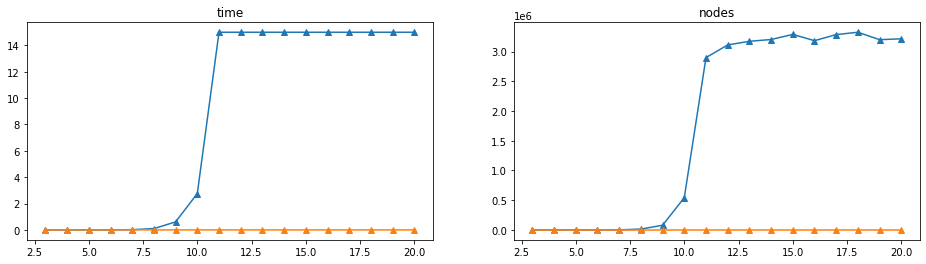

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot(range(3, 21,1), [r[1] for r in res],marker="^")
axs[0].plot(range(3, 21,1), [r[1] for r in res_alldiff],marker="^")
axs[0].set_title("time")

axs[1].plot(range(3, 21,1), [r[0] for r in res],marker="^")
axs[1].plot(range(3, 21,1), [r[0] for r in res_alldiff],marker="^")
axs[1].set_title("nodes")



Using the model_alldiff(n), solve this problem for $n=  \{10, 100, 1000, 10000, 100000 \}$. Whar are the values of the runtime and the number of nodes? 

In [21]:
res_10 = []
values = [10,100,1000,10000,100000] 
for i in values:
    mdl = model_using_alldiff(i)
    params = CpoParameters(TimeLimit=15, LogPeriod=100000)
    res_10.append(run(mdl,params))

<ipython-input-14-9aa483fe31a1>:6(stream:23:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9])
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 10 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 299.1 kB (before), 299.1 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! --------------------------

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 1000 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 9964.3 (before), 9964.3 (after)
 !  . Memory usage      : 643.8 kB (before), 643.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 1.4 MB (1.3 MB CP Optimizer + 0.1 MB Concert)
 ! Time spent in solve    : 0.00s (0.00s e

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 10000 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 132875.7 (before), 132875.7 (after)
 !  . Memory usage      : 4.1 MB (before), 4.1 MB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 10.6 MB (9.7 MB CP Optimizer + 0.9 MB Concert)
 ! Time spent in solve    : 0.00s (0.00s

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 100000 variables, 1 constraint
 ! TimeLimit            = 15
 ! Workers              = 1
 ! LogPeriod            = 100000
 ! Presolve             = Off
 ! Initial process time : 0.17s (0.17s extraction + 0.00s propagation)
 !  . Log search space  : 1660962.6 (before), 1660962.6 (after)
 !  . Memory usage      : 38.0 MB (before), 38.0 MB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 98.4 MB (89.3 MB CP Optimizer + 9.1 MB Concert)
 ! Time spent in solve    : 0.17s 

Text(0.5, 0, 'n')

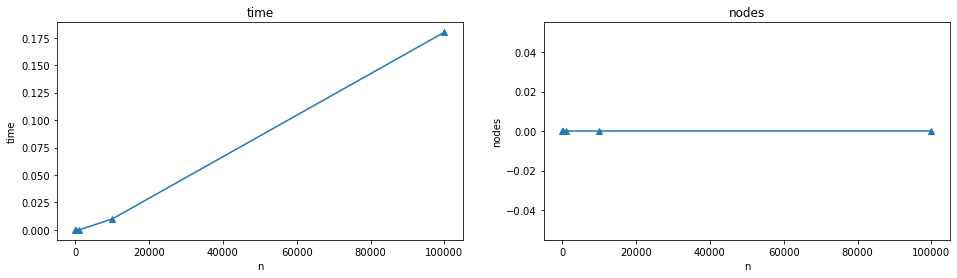

In [22]:
    
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

axs[0].plot([10,100,1000,10000,100000], [r[1] for r in res_10],marker="^")
axs[0].set_title("time")
axs[0].set_ylabel("time")
axs[0].set_xlabel("n")

axs[1].plot([10,100,1000,10000,100000], [r[0] for r in res_10],marker="^")
axs[1].set_title("nodes")
axs[1].set_ylabel("nodes")
axs[1].set_xlabel("n")

What's your overall impression ? what did you learn today? 